In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
#On importe les fichiers CSV sous forme de dataframes
aide_alimentaire = pd.read_csv("aide_alimentaire.csv")
dispo_alimentaire = pd.read_csv("dispo_alimentaire.csv")
population = pd.read_csv("population.csv")
sous_nutrition = pd.read_csv("sous_nutrition.csv")

On regarde à quoi ressemblent les tables pour voir si des modifications sont à prévoir.

In [3]:
aide_alimentaire.head()

,Pays bénéficiaire,Année,Produit,Valeur
0,Afghanistan,2013,Autres non-céréales,682
1,Afghanistan,2014,Autres non-céréales,335
2,Afghanistan,2013,Blé et Farin,39224
3,Afghanistan,2014,Blé et Farin,15160
4,Afghanistan,2013,Céréales,40504


In [4]:
dispo_alimentaire.head()

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [5]:
population.head()

,Zone,Année,Valeur
0,Afghanistan,2013,32269.589
1,Afghanistan,2014,33370.794
2,Afghanistan,2015,34413.603
3,Afghanistan,2016,35383.032
4,Afghanistan,2017,36296.113


In [6]:
sous_nutrition.head()

,Zone,Année,Valeur
0,Afghanistan,2012-2014,8.6
1,Afghanistan,2013-2015,8.8
2,Afghanistan,2014-2016,8.9
3,Afghanistan,2015-2017,9.7
4,Afghanistan,2016-2018,10.5


On se rend compte qu'il y a plusieurs modifications à faire pour améliorer la compréhension globale des tables.

Sur l'ensemble des tables:
- On supprime les accents pour éviter de potentiels problèmes.

In [7]:
aide_alimentaire = aide_alimentaire.rename(columns={"Pays bénéficiaire": "Pays beneficiaire", "Année": "Annee"})
dispo_alimentaire = dispo_alimentaire.rename(columns={"Disponibilité alimentaire (Kcal/personne/jour)": "Disponibilite alimentaire (Kcal/personne/jour)", "Disponibilité alimentaire en quantité (kg/personne/an)": "Disponibilite alimentaire en quantite (kg/personne/an)", "Disponibilité de matière grasse en quantité (g/personne/jour)": "Disponibilite de matiere grasse en quantite (g/personne/jour)", "Disponibilité de protéines en quantité (g/personne/jour)": "Disponibilite de proteines en quantite (g/personne/jour)", "Disponibilité intérieure": "Disponibilite interieure", "Exportations - Quantité": "Exportations - Quantite", "Importations - Quantité": "Importations - Quantite"})
population = population.rename(columns={"Année": "Annee"})
sous_nutrition = sous_nutrition.rename(columns={"Année": "Annee"})

Table aide_alimentaire:
- On change le nom de la colonne "Pays Bénéficiaire" en "Zone" pour correspondre avec les 3 autres tables.
- On explicite la colonne "Valeur" en "Aide en kg".
- On la multiplie par 1 000 pour avoir les valeurs en kg.

In [8]:
aide_alimentaire = aide_alimentaire.rename(columns={"Pays beneficiaire": "Zone", "Valeur": "Aide en kg"})
aide_alimentaire["Aide en kg"] *= 1000

Table dispo_alimentaire:
- On remplace les valeurs NaN par des 0 pour que les calculs se fassent sans problèmes.
- Pour avoir toutes les valeurs en kg, on multiplie par 1 000 000 toutes les colonnes dont l'unité est milliers de tonnes.

In [9]:
dispo_alimentaire.fillna(0, inplace=True)

colonnes_a_multi = ["Aliments pour animaux", "Disponibilite interieure", "Exportations - Quantite", "Importations - Quantite", "Nourriture", "Pertes", "Production", "Semences", "Traitement", "Variation de stock", "Autres Utilisations"]

for foo in colonnes_a_multi:
    dispo_alimentaire[foo] *= 1000000

Table population:
- On change le nom de la colonne "Valeur" en "Population".
- On multiplie par 1 000 pour avoir la population en habitants.

In [10]:
population = population.rename(columns={"Valeur": "Population"})
population["Population"] *= 1000

Table sous_nutrition:
- Après avoir effectué un sous_nutrition.info(), on se rend compte que la colonne "Valeur" n'est pas considérée comme numérique. On la convertit donc en nombre et on remplace les valeurs nulles par des 0.
- On change le nom de la colonne "Valeur" en "Pop_ss_nutrition".
- On multiplie par 1 000 000 pour avoir les valeurs en habitants.
- Pour avoir une année précise plutôt qu'un interval, on sépare les années dans la colonne "Annee" grâce à l'application d'un .split() sur le "-" entre les années puis on fait la moyenne des 2 valeurs.

In [11]:
sous_nutrition["Valeur"] = pd.to_numeric(sous_nutrition["Valeur"], errors="coerce")
sous_nutrition.fillna(0, inplace=True)
sous_nutrition = sous_nutrition.rename(columns={"Valeur": "Pop_ss_nutrition"})
sous_nutrition["Pop_ss_nutrition"] *= 1000000
sous_nutrition["Annee"] = sous_nutrition["Annee"].apply(lambda cell: int((int(cell.split('-')[1]) + int(cell.split('-')[0])) / 2))

## DEMANDES DE MARC


### Proportion de personnes en sous nutrition dans le monde :

On joint les tables population et sous_nutrition pour calculer la proportion de personne en sous nutrition dans le monde

In [12]:
df_pop_ss_nut = pd.merge(population, sous_nutrition, on='Zone', how='inner', suffixes=('_pop', '_ss_nut'))

On supprime toutes les lignes ayant des années qui différent entre les deux tables jointes

In [13]:
df_pop_ss_nut = df_pop_ss_nut.drop(df_pop_ss_nut[df_pop_ss_nut.Annee_pop != df_pop_ss_nut.Annee_ss_nut].index)

On cible l'année 2017 et on supprime les colonnes "Annee" devenues superflues.

In [14]:
df_pop_ss_nut_2017 = df_pop_ss_nut.loc[df_pop_ss_nut["Annee_pop"] == 2017]
df_pop_ss_nut_2017 = df_pop_ss_nut_2017.drop(columns=["Annee_pop", "Annee_ss_nut"])
df_pop_ss_nut_2017.head()

,Zone,Population,Pop_ss_nutrition
28,Afghanistan,36296113.0,10500000.0
64,Afrique du Sud,57009756.0,3100000.0
100,Albanie,2884169.0,100000.0
136,Algérie,41389189.0,1300000.0
172,Allemagne,82658409.0,0.0


Text(0.5, 1.0, 'Proportion de personne en sous nutrition dans le monde en 2017')

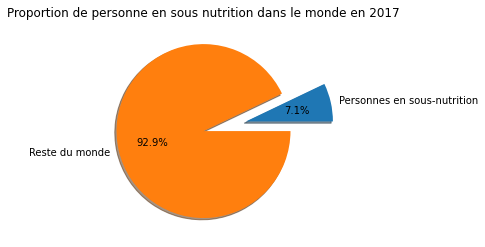

In [15]:
prop_ss_nut_2017 = df_pop_ss_nut_2017["Pop_ss_nutrition"].sum()*100/df_pop_ss_nut_2017["Population"].sum()
# print("En 2017 dans le monde, il y avait environ {:.2f} % de la population en sous nutrition ".format(prop_ss_nut_2017))

labels = ["Personnes en sous-nutrition", "Reste du monde"]
cat = [df_pop_ss_nut_2017["Pop_ss_nutrition"].sum(), df_pop_ss_nut_2017["Population"].sum()-df_pop_ss_nut_2017["Pop_ss_nutrition"].sum()]
explode = (0.5, 0)
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"]

fig, ax=plt.subplots()
ax.pie(cat, labels=labels, explode=explode, autopct='%1.1f%%', shadow=True, startangle=0, colors=colors)
ax.set_title("Proportion de personne en sous nutrition dans le monde en 2017")

### Le nombre de personnes théoriques qui pourrait être nourri à partir de la disponibilité alimentaire :

Les unité de disponibilité alimentaire sont en kcal/pers/jour, on doit donc multiplier chaque dispo par la population du pays pour avoir la disponibilité alimentaire par jour puis par 365 pour la disponibilité par an.

On joint les tables dispo_alimentaire et population sur la colonne "Zone" en filtrant l'année 2017 sans inclure la colonne "Année" de la table population qui est superflue.

In [16]:
dispo_alimentaire = dispo_alimentaire.merge(population.loc[population["Annee"] == 2017,["Zone", "Population"]], on='Zone')

dispo_alimentaire["dispo_produit"] = dispo_alimentaire["Disponibilite alimentaire (Kcal/personne/jour)"]*dispo_alimentaire["Population"]*365

In [17]:
# On fait la somme de toutes les disponibilités des produits pour avoir le nombre total de kcal produites.
dispo_mondiale = dispo_alimentaire["dispo_produit"].sum()

# On divise ce résultat par les besoins moyens d'un humain soit 2250 de moyenne entre les hommes et les femmes selon l'OMS multiplié par 365 pour avoir les besoins annuels.
nb_pers_nourri = dispo_mondiale/(2250*365)

# On calcule ensuite la proportion de la population mondiale de 2017 que cela représente.
prop = nb_pers_nourri / population.loc[population["Annee"] == 2017]["Population"].sum()*100
print("Dans le monde en 2017, on a produit {:,.0f} calories. De quoi nourrir {:,.0f} personnes, soit environ {:,.2f}% de la population mondiale de l'époque.".format(dispo_mondiale, nb_pers_nourri, prop))

Dans le monde en 2017, on a produit 7,635,429,388,975,815 calories. De quoi nourrir 9,297,326,501 personnes, soit environ 123.17% de la population mondiale de l'époque.


### Le nombre de personnes théoriques qui pourrait être nourri à partir de la disponibilité alimentaire d'origine végétale :

Même principe que précédemment sauf que l'on sélectionne uniquement les produits d'origine végétale avec un .loc[]

In [18]:
dispo_mondiale_vege = dispo_alimentaire.loc[dispo_alimentaire["Origine"] == "vegetale"]["dispo_produit"].sum()
nb_pers_nourri_vege = dispo_mondiale_vege/(2250*365)
prop_vege = nb_pers_nourri_vege / population.loc[population["Annee"] == 2017]["Population"].sum()*100
print("Dans le monde en 2017, on a produit {:,.0f} calories d'origine végétale. De quoi nourrir {:,.0f} personnes, soit environ {:,.2f}% de la population mondiale de l'époque.".format(dispo_mondiale_vege, nb_pers_nourri_vege, prop_vege))

Dans le monde en 2017, on a produit 6,300,178,937,197,865 calories d'origine végétale. De quoi nourrir 7,671,450,761 personnes, soit environ 101.63% de la population mondiale de l'époque.


### Utilisation de la disponibilité intérieure :

Text(0.5, 1.1, 'Utilisation de la disponibilité intérieure dans le monde en 2017')

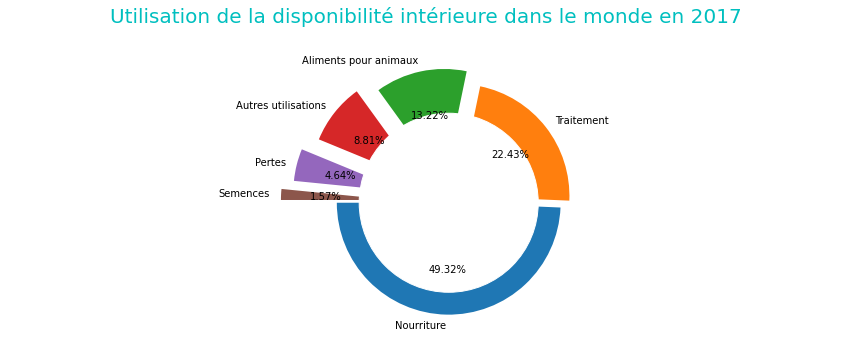

In [19]:
utilisation_nourriture = dispo_alimentaire["Nourriture"].sum()/dispo_alimentaire["Disponibilite interieure"].sum()*100

utilisation_semences = dispo_alimentaire["Semences"].sum()/dispo_alimentaire["Disponibilite interieure"].sum()*100

utilisation_traitement = dispo_alimentaire["Traitement"].sum()/dispo_alimentaire["Disponibilite interieure"].sum()*100

utilisation_autre = dispo_alimentaire["Autres Utilisations"].sum()/dispo_alimentaire["Disponibilite interieure"].sum()*100

utilisation_animaux = dispo_alimentaire["Aliments pour animaux"].sum()/dispo_alimentaire["Disponibilite interieure"].sum()*100

pertes = dispo_alimentaire["Pertes"].sum()/dispo_alimentaire["Disponibilite interieure"].sum()*100

dispo_labels = ["Nourriture", "Traitement", "Aliments pour animaux", "Autres utilisations", "Pertes", "Semences"]
dispo_sect = [utilisation_nourriture, utilisation_traitement, utilisation_animaux, utilisation_autre, pertes, utilisation_semences]
explode = (0, 0.1, 0.2, 0.3, 0.4, 0.5)
colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple", "tab:brown", "tab:pink", "tab:gray", "tab:olive", "tab:cyan"]
my_circle = plt.Circle((0, 0), 0.8, color='white')

fig, ax=plt.subplots(figsize=(15, 5))
ax.pie(dispo_sect, labels=dispo_labels, autopct='%1.2f%%', startangle=180, labeldistance=1.1, colors=colors, explode=explode)
ax.axis('equal')
fig.gca().add_artist(my_circle)
ax.set_title("Utilisation de la disponibilité intérieure dans le monde en 2017", loc="center", pad=None, y=1.1, size="20", c="c")


## DEMANDES DE JULIEN

### Utilisation des céréales :

Après avoir cherché sur le site de la FAO, on trouve que les céréales regroupent les produits suivants :
- Avoine
- Blé
- Céréales, Autres
- Maïs
- Millet
- Orge
- Riz (Eq Blanchi)
- Seigle
- Sorgho

On sélectionne donc les produits correspondants et on recrée une table

In [20]:
cereales = dispo_alimentaire.loc[dispo_alimentaire["Produit"].isin(["Avoine", "Blé", "Céréales, Autres", "Maïs", "Millet", "Orge", "Riz (Eq Blanchi)", "Seigle", "Sorgho"])]

cereales_nourriture = cereales["Nourriture"].sum()/cereales["Disponibilite interieure"].sum()*100
cereales_animaux = cereales["Aliments pour animaux"].sum()/cereales["Disponibilite interieure"].sum()*100

print("Les céréales sont utilisées à {:.2f}% pour l'alimentation humaine et {:.2f}% pour l'alimentation animale.".format(cereales_nourriture, cereales_animaux))

Les céréales sont utilisées à 42.91% pour l'alimentation humaine et 36.14% pour l'alimentation animale.


### Cas du manioc en Thaïlande :

On commence par calculer la proportion de thaïlandais en sous nutrition :

In [21]:
ss_nut_thai = df_pop_ss_nut_2017.loc[df_pop_ss_nut_2017["Zone"] == "Thaïlande"]
prop_ss_nut_thai = ss_nut_thai["Pop_ss_nutrition"].iloc[0]/ss_nut_thai["Population"].iloc[0]*100

On regarde ensuite le ratio des exportations de manioc par rapport à sa production:

In [22]:
manioc_thai = dispo_alimentaire.loc[(dispo_alimentaire["Zone"] == "Thaïlande") & (dispo_alimentaire["Produit"] == "Manioc")]
export_manioc = manioc_thai["Exportations - Quantite"].iloc[0]/manioc_thai["Production"].iloc[0]*100
print("En 2017, la Thaïlande a exporté {:.2f}% du manioc produit dans le pays alors que {:.2f}% de sa population étaient en sous nutrition.".format(export_manioc, prop_ss_nut_thai))

En 2017, la Thaïlande a exporté 83.41% du manioc produit dans le pays alors que 8.96% de sa population étaient en sous nutrition.


## DEMANDES DE MELANIE

Les pays avec la proportion de personnes en sous nutrition la plus forte :

In [23]:
df_pop_ss_nut_2017["Proportion_ss_nut"] = df_pop_ss_nut_2017["Pop_ss_nutrition"]/df_pop_ss_nut_2017["Population"]*100
df_pop_ss_nut_2017[["Zone", "Proportion_ss_nut"]].sort_values(by="Proportion_ss_nut", ascending=False).head(10)

,Zone,Proportion_ss_nut
2836,Haïti,48.259182
5680,République populaire démocratique de Corée,47.188685
3916,Madagascar,41.062924
3736,Libéria,38.279742
3628,Lesotho,38.249438
6616,Tchad,37.957606
5824,Rwanda,35.055619
4384,Mozambique,32.810898
6724,Timor-Leste,32.173531
28,Afghanistan,28.928718


L'aide reçue par les pays depuis 2013 :

In [24]:
aide_depuis2013 = aide_alimentaire.groupby("Zone")[["Zone", "Aide en kg"]].sum()

Les pays ayant le plus bénéficié d'aide depuis 2013 :

In [25]:
sorted_aide_plus = aide_depuis2013.sort_values(by="Aide en kg", ascending=False).reset_index()

Les pays ayant le moins bénéficié d'aide depuis 2013 :

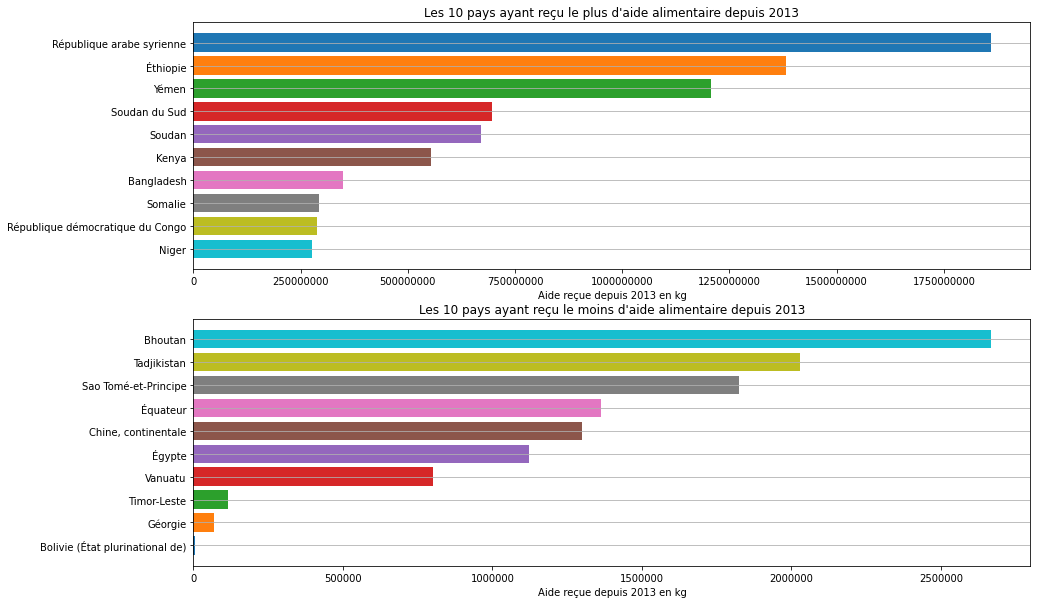

In [26]:
sorted_aide_moins = aide_depuis2013.sort_values(by="Aide en kg", ascending=True).reset_index()

fig, ax = plt.subplots(2, 1, figsize=(15, 10))
ax[0].barh(sorted_aide_plus["Zone"].head(10), sorted_aide_plus["Aide en kg"].head(10), color=colors)
ax[0].set_title("Les 10 pays ayant reçu le plus d'aide alimentaire depuis 2013")
ax[0].set_xlabel("Aide reçue depuis 2013 en kg")
ax[0].grid(visible=True, axis='y')
ax[0].invert_yaxis()
ax[0].ticklabel_format(axis="x", style="plain")

ax[1].barh(sorted_aide_moins["Zone"].head(10), sorted_aide_moins["Aide en kg"].head(10), color=colors)
ax[1].set_title("Les 10 pays ayant reçu le moins d'aide alimentaire depuis 2013")
ax[1].set_xlabel("Aide reçue depuis 2013 en kg")
ax[1].grid(visible=True, axis='y')
ax[1].ticklabel_format(axis="x", style="plain")

Les pays avec la disponibilité par habitant la plus importante :

In [27]:
dispo_par_pays = dispo_alimentaire.groupby(by="Zone")[["Zone","Disponibilite alimentaire (Kcal/personne/jour)"]].sum()
dispo_plus = dispo_par_pays.sort_values(by="Disponibilite alimentaire (Kcal/personne/jour)", ascending=False).reset_index()

Les pays avec la disponibilité par habitant la plus faible :

In [28]:
dispo_moins = dispo_par_pays.sort_values(by="Disponibilite alimentaire (Kcal/personne/jour)").reset_index()

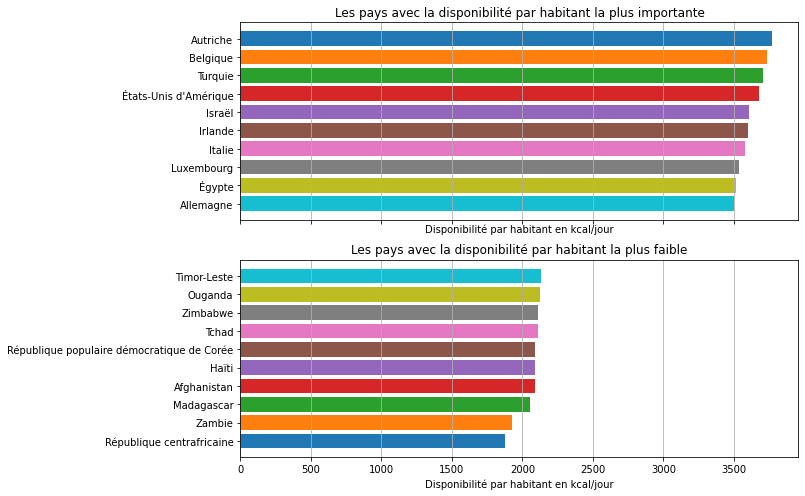

In [29]:
fig, ax = plt.subplots(2, 1, sharex=True, figsize=(10, 8))
ax[0].barh(dispo_plus["Zone"].head(10), dispo_plus["Disponibilite alimentaire (Kcal/personne/jour)"].head(10), color=colors)
ax[0].set_title("Les pays avec la disponibilité par habitant la plus importante")
ax[0].set_xlabel("Disponibilité par habitant en kcal/jour")
ax[0].yaxis.set_ticks(dispo_plus["Zone"].head(10))
ax[0].grid(visible=True, axis='x')
ax[0].invert_yaxis()

ax[1].barh(dispo_moins["Zone"].head(10), dispo_moins["Disponibilite alimentaire (Kcal/personne/jour)"].head(10), color=colors)
ax[1].set_title("Les pays avec la disponibilité par habitant la plus faible")
ax[1].set_xlabel("Disponibilité par habitant en kcal/jour")
ax[1].yaxis.set_ticks(dispo_moins["Zone"].head(10))
ax[1].grid(visible=True, axis='x')

Pour avoir une idée des pays dont l'état s'aggrave, on regarde ce qui ont la plus grande progression de population en sous nutrition depuis 2013.

On joint les tables population et sous_nutrition sur la colonne "Zone" (en jointure interne pour garder toutes les infos) pour pouvoir calculer les proportions de personne en sous nutrition (comme au début du projet):

In [30]:
population_ss_nut_par_annee = pd.merge(population, sous_nutrition, on='Zone', how='inner', suffixes=('_pop', '_ss_nut'))

On supprime les doublons :

In [31]:
population_ss_nut_par_annee = population_ss_nut_par_annee.drop(population_ss_nut_par_annee.loc[population_ss_nut_par_annee["Annee_pop"] != population_ss_nut_par_annee["Annee_ss_nut"]].index)

On calcule les taux de personne en sous nutrition par pays et par année, puis on crée 2 tables pour les années 2013 et 2018 :

In [32]:
population_ss_nut_par_annee["taux_ss_nut"] = population_ss_nut_par_annee["Pop_ss_nutrition"] / population_ss_nut_par_annee["Population"] *100
population_ss_nut_par_annee = population_ss_nut_par_annee.rename(columns={"Annee_pop" :"Annee"})
population_ss_nut_par_annee = population_ss_nut_par_annee.drop(["Annee_ss_nut"], axis=1)

population_ss_nut_2013 = population_ss_nut_par_annee.loc[(population_ss_nut_par_annee["Annee"] == 2013) & (population_ss_nut_par_annee["Pop_ss_nutrition"] > 0)]
population_ss_nut_2018 = population_ss_nut_par_annee.loc[(population_ss_nut_par_annee["Annee"] == 2018) & (population_ss_nut_par_annee["Pop_ss_nutrition"] > 0)]

On joint les deux tables pour pouvoir calculer l'évolution du taux de sous nutrition entre 2013 puis on supprime les colonnes inutiles à la lecture des résultats :

Text(0.5, 1.0, 'Les 10 pays dans lesquels la sous nutrition a le plus progressé en 2013 et 2018')

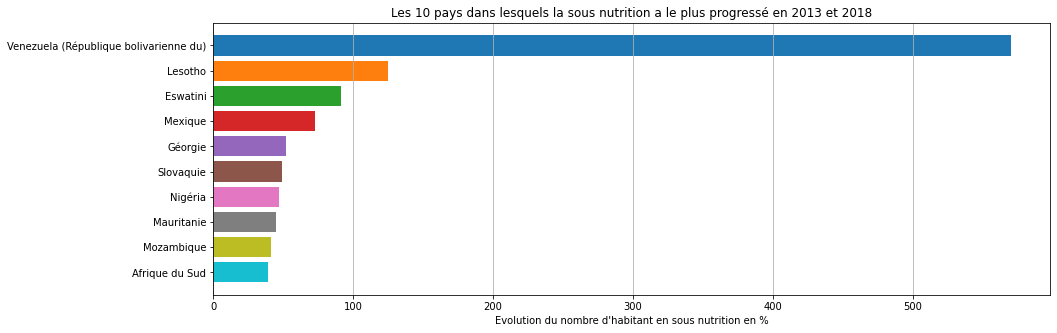

In [33]:
evolution_ss_nut = pd.merge(population_ss_nut_2013, population_ss_nut_2018, on="Zone", how="inner", suffixes=("_2013", "_2018"))

evolution_ss_nut["Evolution_ss_nut"] = (evolution_ss_nut["taux_ss_nut_2018"] - evolution_ss_nut["taux_ss_nut_2013"]) / evolution_ss_nut["taux_ss_nut_2013"]*100
evolution_ss_nut_mini = evolution_ss_nut[["Zone", "Evolution_ss_nut"]]

s_evolution_ss_nut_mini = evolution_ss_nut_mini.sort_values(by="Evolution_ss_nut", ascending=False)

s_evolution_ss_nut_mini.head(10)

fig, ax = plt.subplots(figsize=(15, 5))
ax.barh(s_evolution_ss_nut_mini["Zone"].head(10), s_evolution_ss_nut_mini["Evolution_ss_nut"].head(10), color=colors)
ax.set_xlabel("Evolution du nombre d'habitant en sous nutrition en %")
ax.invert_yaxis()
ax.grid(visible=True, axis="x")
ax.set_title("Les 10 pays dans lesquels la sous nutrition a le plus progressé en 2013 et 2018")